Nome: Daniel Oliveira dos Santos            
Matrícula: 564307         
Nível: Mestrado              
Email: daniel.odossantos@alu.ufc.br         
Área: Ciência da Computação    
Disciplina: Tópicos especiais em lógica 1     
LISTA 01
Google drive do código:
 https://drive.google.com/drive/folders/10s8F38U3gDwv5qssWTxxMPYt2NaUl8oy?usp=sharing


In [1]:
# Bibliotecas

# Calculos matemática e estatística
import math
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import t

# tratamento de dados
import pandas as pd
import numpy as np

# Gráficos
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# **Questão 01**

# Problema de Estimativa com Moeda

Você joga uma moeda 10 vezes, observando 8 vezes o resultado cara (X = 1). Considerando um modelo Beta-Bernoulli:

## 1. Estimativas de Probabilidade \( \theta \)

Calcule a probabilidade \( \theta \) dessa moeda dar cara (X = 1) considerando as seguintes estimativas:

### (i) Estimação de Máxima Verossimilhança (ML)

### (ii) Estimação a Posteriori Máxima (MAP)

### (iii) Média da Posteriori (Solução Bayesiana)

## 2. Plotagem das Distribuições

Plote as distribuições (priori e posteriori) e a verossimilhança desse modelo considerando as seguintes priors:

- \( p(\theta) = \text{Beta}(\theta|a = 1, b = 1) \)
- \( p(\theta) = \text{Beta}(\theta|a = 2, b = 2) \)


In [2]:
moedas = 10
cara = 8

# Prior Beta(1, 1)
a1 = 1
b1 = 1

# Prior Beta(2, 2)
a2 = 2
b2 = 2

# Estimação de Máxima Verossimilhança (ML)
ml = cara/moedas

print(f'Estimação de Máxima Verossimilhança {ml}')

# Prior Beta(a, b)

# Estimação a Posteriori Máxima (MAP)

map_beta1 = (cara + a1 - 1) / (moedas + a1 + b1  - 2)

print(f'Estimação a Posteriori Máxima com prior Beta(1, 1): {map_beta1}')


map_beta2 = (cara + a2 - 1) / (moedas + a2 + b2  - 2)

print(f'Estimação a Posteriori Máxima com prior Beta(2, 2): {map_beta2}')

# Média da Posteriori (Solução Bayesiana)

media_posteriori1 = (cara + a1) / (moedas + a1 + b1)
print(f'Média da posteriori para uma distribuição Beta posteriori com prior Beta(1, 1) {media_posteriori1}')


media_posteriori2 = (cara + a2) / (moedas + a2 + b2)
print(f'Média da posteriori para uma distribuição Beta posteriori com prior Beta(2, 2) {media_posteriori2}')

Estimação de Máxima Verossimilhança 0.8
Estimação a Posteriori Máxima com prior Beta(1, 1): 0.8
Estimação a Posteriori Máxima com prior Beta(2, 2): 0.75
Média da posteriori para uma distribuição Beta posteriori com prior Beta(1, 1) 0.75
Média da posteriori para uma distribuição Beta posteriori com prior Beta(2, 2) 0.7142857142857143


In [3]:
# Plotando o Gráfico

# Definindo intervalo de valores para theta
theta_vals = np.linspace(0, 1, 100)

# Calculando distribuições Priori e Posteriori
prior_beta11 = beta.pdf(theta_vals, a1, b1)
prior_beta22 = beta.pdf(theta_vals, a2, b2)
post_beta11 = beta.pdf(theta_vals, cara + a1, moedas - cara + b1)
post_beta22 = beta.pdf(theta_vals, cara + a2, moedas - cara + b2)

# Verossimilhança
verossimilhanca = theta_vals**cara * (1 - theta_vals)**(moedas - cara)
verossimilhanca /= verossimilhanca.max()  # Normalizando para plotar com a mesma escala

# Criar DataFrame para plotagem
df = pd.DataFrame({
    "θ (theta)": np.tile(theta_vals, 5),
    "Densidade": np.concatenate([prior_beta11, prior_beta22, post_beta11, post_beta22, verossimilhanca]),
    "Distribuição": ["Prior Beta(1,1)"] * 100 + ["Prior Beta(2,2)"] * 100 +
                    ["Posterior Beta(1,1)"] * 100 + ["Posterior Beta(2,2)"] * 100 + ["Verossimilhança"] * 100
})

df

,θ (theta),Densidade,Distribuição
0,0.000000,1.000000,"Prior Beta(1,1)"
1,0.010101,1.000000,"Prior Beta(1,1)"
2,0.020202,1.000000,"Prior Beta(1,1)"
3,0.030303,1.000000,"Prior Beta(1,1)"
4,0.040404,1.000000,"Prior Beta(1,1)"
...,...,...,...
495,0.959596,0.174917,Verossimilhança
496,0.969697,0.106988,Verossimilhança
497,0.979798,0.051660,Verossimilhança
498,0.989899,0.014019,Verossimilhança


In [4]:

# Plotagem com Plotly Express
fig = px.line(df, x="θ (theta)", y="Densidade", color="Distribuição",
              title="Distribuições Priori e Posteriori com diferentes Prioris Beta",
              labels={"θ (theta)": "θ (Probabilidade de Cara)", "Densidade": "Densidade de Probabilidade"})
fig.show()

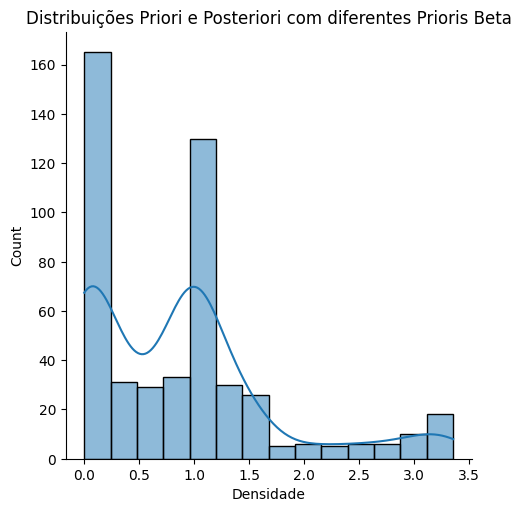

In [5]:
#sns.displot(df.iloc[:,0], kde=True, color='green')
sns.displot(df.iloc[:,1], kde=True)
#sns.displot(df.iloc[:,3], kde=True)
plt.title('Distribuições Priori e Posteriori com diferentes Prioris Beta')
plt.show()

# **Questão 02**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/2_semestre/topicos_especiais_em_logica_1/Lista_01/amaprob_trab1/cleaned_reviews.csv'

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
#from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [9]:
#df = pd.read_csv(link).dropna()
data = pd.read_csv(link).dropna()

# Selecionar 1000 amostras aleatórias
#data = df.sample(n=1000, random_state=42)

In [10]:
data.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


In [11]:
data.shape

(17337, 4)

# **Gráficos e Relátorios**

In [12]:
def relatorio(rel):
    cabecalho = {
        'selector': 'th',
        'props': 'font-family: Helvetica; color: #dddd55; background-color: #34495E; text-align: center;'
    }

    celulas = {
        'selector': 'td',
        'props': 'font-family: Helvetica; color: white; background-color: #34495E; text-align: left;'
    }


    estilo_01 = rel.style.format('{:.2f}')
    return estilo_01.set_table_styles([cabecalho, celulas])

# =======================================================================================================

def grafico_linha(titulo, categorias, valores, exibir=True):

    valores = pd.Series(valores)
    val_array = np.array(valores)
    desvio_padrao = np.std(val_array).round(2)
    media = np.mean(val_array).round(2)
    mediana = np.median(val_array).round(2)
    erro = valores.sem().round(2)  # Erro padrão médio

    # Definindo o nível de confiança (95% neste caso)
    confidence_level = 0.95
    graus_de_liberdade = len(valores) - 1

    t_critical = t.ppf(q=(1 + confidence_level) / 2, df=graus_de_liberdade) # Calcular o valor crítico
    margin_of_error = t_critical * erro # Calcular a margem de erro
    confidence_interval = (media - margin_of_error).round(2), (media + margin_of_error).round(2) # Calcular o intervalo de confiança


    # Criando o gráfico de linhas com Plotly Express
    fig = px.line(x=categorias, y=valores, title=titulo, text=valores.round(2))
    fig.update_traces(mode='lines+markers+text', textposition='top center')

    # Personalizando o layout do gráfico com Plotly Graph Objects (opcional)
    fig.update_layout(
        xaxis_title='Categorias',
        yaxis_title='Valores',
        hovermode='x',
        template='plotly_white',
        width=1300,  # Largura do gráfico
        height=400,  # Altura do gráfico
        margin=dict(l=20, r=260, t=35, b=20),  # Define as margens
        title_font=dict(size=20, color='black'),  # Estilo do título
        xaxis=dict(title=dict(font=dict(size=14, color='black')), tickfont=dict(color='black')),  # Estilo do eixo X
        yaxis=dict(title=dict(font=dict(size=14, color='black')), tickfont=dict(color='black'))   # Estilo do eixo Y
    )

    if exibir == True:

        fig.add_annotation(
            text=f'<b>Resultados</b><br> Desvio Padrão: {desvio_padrao}<br> Média: {media}<br> Mediana: {mediana}\
                  <br> Erro padrão médio: {erro}<br> Margin de erro: {margin_of_error.round(3)}<br> Intervalo de confiança: {confidence_interval}',
            xref='paper',  # Posicionamento em relação ao papel (gráfico)
            yref='paper',  # Posicionamento em relação ao papel (gráfico)
            x=1.25,  # Posição horizontal do texto
            y=0.85,   # Posição vertical do texto
            showarrow=False,  # Não exibir seta
            font=dict(size=14, color='black'),  # Tamanho da fonte do texto
            bgcolor='lightblue',  # Cor de fundo azul claro
            borderwidth=1,  # Largura da borda
            align='left',  # Justifica o texto à esquerda

        )

    return fig.show()

In [13]:
# Função para treinar o Naive Bayes Bernoulli
def naive_bayes_bernoulli(X_train, y_train, priors,alpha=1e-5):
    # Número de classes (sentimentos) e número de palavras
    num_classes = len(np.unique(y_train))
    num_palavras = X_train.shape[1]

    # Inicialização das probabilidades a priori
    classe_probabilidade = np.zeros(num_classes)
    classe_palavras_probabilidade = np.zeros((num_classes, num_palavras))

    for c in range(num_classes):
        # Selecionando as amostras da classe c
        X_c = X_train[y_train == c]
        num_c = X_c.shape[0]

        # Calculando a probabilidade a priori de cada classe (usando a frequência de classes)
        classe_probabilidade[c] = num_c / X_train.shape[0]

        # Calculando a probabilidade de cada palavra (usando a verossimilhança de Bernoulli)
        palavra_presente = np.sum(X_c, axis=0) + priors[0] + alpha  # Priors adicionados para presença
        palavra_ausente = num_c - np.sum(X_c, axis=0) + priors[1] + alpha # Priors para ausência
        classe_palavras_probabilidade[c] = palavra_presente / (palavra_presente + palavra_ausente)

    return classe_probabilidade, classe_palavras_probabilidade

# Função para prever as classes usando Naive Bayes Bernoulli
def prever_naive_bayes(X, classe_probabilidade, classe_palavras_probabilidade):
    num_linhas = X.shape[0]
    num_classes = len(classe_probabilidade)
    posteriore = np.zeros((num_linhas, num_classes))

    for i in range(num_classes):
        priore = classe_probabilidade[i]
        probabilidade_palavras = classe_palavras_probabilidade[i]

        # Calculando a verossimilhança para cada exemplo
        verossimilhança = np.prod((X * probabilidade_palavras) + ((1 - X) * (1 - probabilidade_palavras)), axis=1)

        # Ajustando a posteriori
        posteriore[:, i] = priore * verossimilhança

    # Retorna a classe com maior probabilidade posterior
    return np.argmax(posteriore, axis=1)

In [14]:
# Função para avaliar o desempenho do modelo
def avaliar_naive_bayes(dados, priors, num_repeticoes=20, sample_size=1000):
    resultado_acuracia = {}
    resultado_media_desvio = {}

    # Transformar rótulos de sentimento em inteiros
    dados['sentiments'] = LabelEncoder().fit_transform(dados['sentiments'])

    for a, b in priors:
        acuracias = []
        for _ in range(num_repeticoes):
            # Selecionar uma amostra aleatória de tamanho `sample_size`
            amostra = dados.sample(n=sample_size, random_state=np.random.randint(1000))
            #X_sample = amostra.drop(columns=['sentiments','cleaned_review']).values
            #X_sample = amostra.drop(columns=['cleaned_review'])
            X_sample = amostra['cleaned_review'].values
            y_sample = amostra['sentiments'].values

            # Dividir a amostra em treino e teste
            X_train, X_test, y_train, y_test = train_test_split(
                X_sample, y_sample, test_size=0.25, stratify=y_sample, random_state=42)#np.random.randint(1000)
            #)

            # Converter os textos em vetores binários usando Bag-of-Words
            vectorizer = CountVectorizer(binary=True)
            X_train = vectorizer.fit_transform(X_train).toarray()
            X_test = vectorizer.transform(X_test).toarray()

            # Treinar o Naive Bayes Bernoulli
            classe_probabilidade, classe_palavras_probabilidade = naive_bayes_bernoulli(X_train, y_train, priors=(a, b))

            # Prever no conjunto de teste
            y_pred = prever_naive_bayes(X_test, classe_probabilidade, classe_palavras_probabilidade)
            acc = accuracy_score(y_test, y_pred)
            acuracias.append(acc)

        # Calcular média e desvio padrão da acurácia
        mean_accuracy = np.mean(acuracias)
        std_accuracy = np.std(acuracias)

        # Exibir resultados
        resultado_acuracia[f"Beta(a={a}, b={b})"] = {
            "acuracias": acuracias,
        }
        resultado_media_desvio[f"Beta(a={a}, b={b})"] = {
            "media_acuracia": mean_accuracy,
            "desvio_padrao_acuracia": std_accuracy
        }

    return resultado_media_desvio, resultado_acuracia

In [15]:
priors = [(0.5, 0.5), (1, 1), (2, 2)]  # Priori Beta(θ | a, b)

# Avaliar o modelo
resultado_media_desvio, resultado_acuracia = avaliar_naive_bayes(data, priors)


In [16]:
pd.DataFrame(resultado_media_desvio)

,"Beta(a=0.5, b=0.5)","Beta(a=1, b=1)","Beta(a=2, b=2)"
media_acuracia,0.648600,0.682600,0.684800
desvio_padrao_acuracia,0.037678,0.037848,0.032313


In [17]:
relatorio(pd.DataFrame(resultado_media_desvio))

,"Beta(a=0.5, b=0.5)","Beta(a=1, b=1)","Beta(a=2, b=2)"
media_acuracia,0.65,0.68,0.68
desvio_padrao_acuracia,0.04,0.04,0.03


In [18]:
novo_dados = pd.DataFrame({'Beta(a=0.5, b=0.5)': resultado_acuracia['Beta(a=0.5, b=0.5)']['acuracias'],
             'Beta(a=1, b=1)': resultado_acuracia['Beta(a=1, b=1)']['acuracias'],
             'Beta(a=2, b=2)': resultado_acuracia['Beta(a=2, b=2)']['acuracias'],
             })

relatorio(novo_dados)

,"Beta(a=0.5, b=0.5)","Beta(a=1, b=1)","Beta(a=2, b=2)"
0,0.58,0.69,0.64
1,0.66,0.65,0.73
2,0.60,0.76,0.69
3,0.67,0.62,0.68
4,0.70,0.65,0.73
5,0.64,0.64,0.71
6,0.64,0.73,0.70
7,0.65,0.70,0.63
8,0.72,0.65,0.63
9,0.65,0.68,0.69


In [19]:
# Adicionar o índice como uma coluna para representar o eixo x (θ)
novo_dados = novo_dados.reset_index().rename(columns={"index": "0 (theta)"})


In [20]:
# novo_dados.drop('0 (theta)',axis=1)

novo_dados

,0 (theta),"Beta(a=0.5, b=0.5)","Beta(a=1, b=1)","Beta(a=2, b=2)"
0,0,0.584,0.692,0.644
1,1,0.656,0.648,0.728
2,2,0.604,0.756,0.692
3,3,0.668,0.620,0.680
4,4,0.700,0.648,0.732
5,5,0.640,0.640,0.708
6,6,0.636,0.732,0.700
7,7,0.652,0.700,0.632
8,8,0.716,0.652,0.628
9,9,0.652,0.680,0.688


In [21]:
# Transformar o DataFrame para formato longo para ajustar no gráfico express
novo_dados_melted = novo_dados.melt(id_vars="0 (theta)",
                                    value_vars=["Beta(a=0.5, b=0.5)", "Beta(a=1, b=1)", "Beta(a=2, b=2)"],
                                    var_name="Distribuição", value_name="Acurácia")
novo_dados_melted

,0 (theta),Distribuição,Acurácia
0,0,"Beta(a=0.5, b=0.5)",0.584
1,1,"Beta(a=0.5, b=0.5)",0.656
2,2,"Beta(a=0.5, b=0.5)",0.604
3,3,"Beta(a=0.5, b=0.5)",0.668
4,4,"Beta(a=0.5, b=0.5)",0.700
5,5,"Beta(a=0.5, b=0.5)",0.640
6,6,"Beta(a=0.5, b=0.5)",0.636
7,7,"Beta(a=0.5, b=0.5)",0.652
8,8,"Beta(a=0.5, b=0.5)",0.716
9,9,"Beta(a=0.5, b=0.5)",0.652


In [22]:
# Plotar o gráfico
fig = px.line(novo_dados_melted, x="0 (theta)", y="Acurácia", color="Distribuição",
              title="Acurácia para Diferentes Distribuições Beta",
              labels={"θ (theta)": "Índice", "Acurácia": "Acurácia"})
fig.show()

In [23]:
grafico_linha('Bernoulli Naive Bayes Bayesiano Distribuição, Beta(a=0.5, b=0.5)',novo_dados['0 (theta)'].values, novo_dados['Beta(a=0.5, b=0.5)'].values,  exibir=True)

In [24]:
grafico_linha('Bernoulli Naive Bayes Bayesiano Distribuição, Beta(a=1, b=1)',novo_dados['0 (theta)'].values, novo_dados['Beta(a=1, b=1)'].values,  exibir=True)

In [25]:
grafico_linha('Bernoulli Naive Bayes Bayesiano Distribuição, Beta(a=2, b=2)',novo_dados['0 (theta)'].values, novo_dados['Beta(a=2, b=2)'].values,  exibir=True)

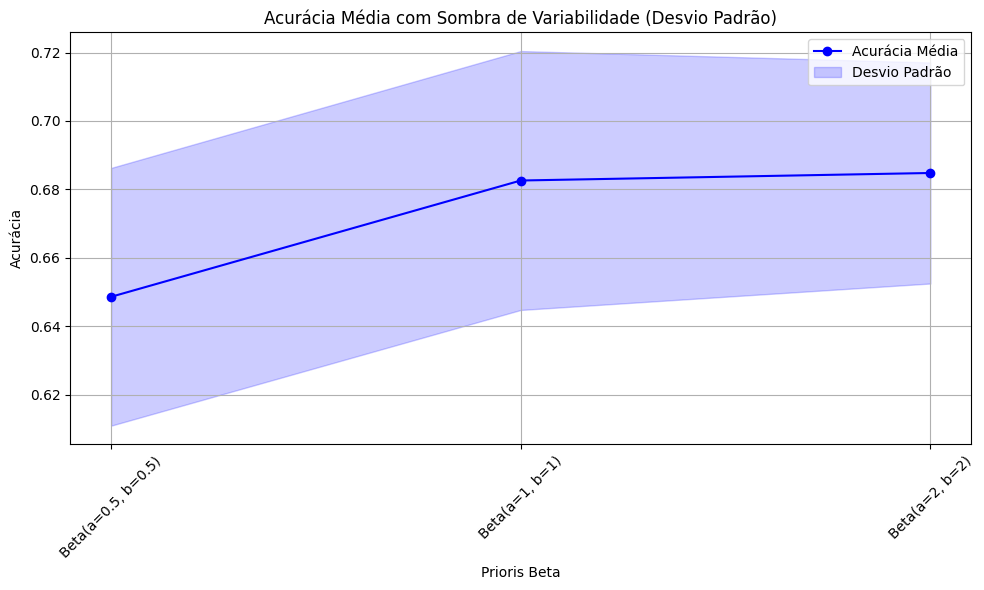

In [28]:
# Dados para o gráfico
priors_labels = [f"Beta(a={a}, b={b})" for a, b in priors]
mean_accuracies = [resultado_media_desvio[label]["media_acuracia"] for label in priors_labels]
std_accuracies = [resultado_media_desvio[label]["desvio_padrao_acuracia"] for label in priors_labels]


x = np.arange(len(priors))


plt.figure(figsize=(10, 6))
plt.plot(x, mean_accuracies, color="blue", marker="o", label="Acurácia Média")


plt.fill_between(
    x,
    np.array(mean_accuracies) - np.array(std_accuracies),
    np.array(mean_accuracies) + np.array(std_accuracies),
    color="blue", alpha=0.2, label="Desvio Padrão"
)

# gráfico
plt.xticks(x, priors_labels, rotation=45)
plt.xlabel("Prioris Beta")
plt.ylabel("Acurácia")
plt.title("Acurácia Média de Variabilidade (Desvio Padrão)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()